In [60]:
%pip install pandas scapy matplotlib seaborn category_encoders

Note: you may need to restart the kernel to use updated packages.


In [61]:
import pandas as pd

DNN_data = pd.read_csv("DNN-EdgeIIoT-dataset.csv",low_memory=False)

In [62]:
taken_features = ['ip.src_host', 'ip.dst_host','arp.opcode', 'arp.hw.size', 'icmp.checksum', 'icmp.seq_le', 'http.content_length', 'http.request.method', 'http.referer', 'http.request.version', 'http.response', 'tcp.ack', 'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.seq', 'udp.stream', 'udp.time_delta', 'dns.qry.name', 'dns.qry.name.len', 'dns.qry.qu', 'dns.retransmission', 'dns.retransmit_request', 'mqtt.conack.flags', 'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len', 'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.protoname', 'mqtt.topic', 'mqtt.topic_len', 'mqtt.ver', 'Attack_label', 'Attack_type']
total_features = DNN_data.columns
features_to_be_dropped = []
for feature in total_features:
    if feature not in taken_features:
        features_to_be_dropped.append(feature)


In [63]:
features_to_be_dropped

['frame.time',
 'arp.dst.proto_ipv4',
 'arp.src.proto_ipv4',
 'icmp.transmit_timestamp',
 'icmp.unused',
 'http.file_data',
 'http.request.uri.query',
 'http.request.full_uri',
 'http.tls_port',
 'tcp.dstport',
 'tcp.options',
 'tcp.payload',
 'tcp.srcport',
 'udp.port',
 'dns.qry.type',
 'dns.retransmit_request_in',
 'mqtt.msg_decoded_as',
 'mqtt.msg',
 'mbtcp.len',
 'mbtcp.trans_id',
 'mbtcp.unit_id']

In [64]:
DNN_data = DNN_data.drop(columns = features_to_be_dropped)

In [65]:
DNN_data['Attack_type'].unique()


array(['Normal', 'MITM', 'Uploading', 'Ransomware', 'SQL_injection',
       'DDoS_HTTP', 'DDoS_TCP', 'Password', 'Port_Scanning',
       'Vulnerability_scanner', 'Backdoor', 'XSS', 'Fingerprinting',
       'DDoS_UDP', 'DDoS_ICMP'], dtype=object)

In [66]:
DNN_data.dropna(inplace=True)

In [67]:
DNN_data.drop_duplicates(inplace=True)

In [68]:
from sklearn.utils import shuffle
DNN_data = shuffle(DNN_data).reset_index(drop=True)

In [69]:
print(DNN_data.select_dtypes(include=['object']).columns)

Index(['ip.src_host', 'ip.dst_host', 'http.request.method', 'http.referer',
       'http.request.version', 'dns.qry.name.len', 'mqtt.conack.flags',
       'mqtt.protoname', 'mqtt.topic', 'Attack_type'],
      dtype='object')


In [70]:
DNN_data['Attack_label'].unique()
DNN_data['Attack_type'].unique()

array(['DDoS_UDP', 'Normal', 'Vulnerability_scanner', 'DDoS_ICMP',
       'Password', 'Backdoor', 'Port_Scanning', 'DDoS_HTTP',
       'SQL_injection', 'Uploading', 'DDoS_TCP', 'XSS', 'Ransomware',
       'Fingerprinting', 'MITM'], dtype=object)

In [71]:
def summarize_by_category(df):
    return df['Attack_type'].value_counts() 

In [72]:
original_DNN_data = pd.read_csv("DNN-EdgeIIoT-dataset.csv", low_memory=False)
summary_original_DNN = summarize_by_category(original_DNN_data)

In [73]:
summary_preprocessed_DNN = summarize_by_category(DNN_data)

In [74]:
print("DNN data: original")
print(summary_original_DNN)
print("DNN data: preprocessed")

print(summary_preprocessed_DNN)

DNN data: original
Attack_type
Normal                   1615643
DDoS_UDP                  121568
DDoS_ICMP                 116436
SQL_injection              51203
Password                   50153
Vulnerability_scanner      50110
DDoS_TCP                   50062
DDoS_HTTP                  49911
Uploading                  37634
Backdoor                   24862
Port_Scanning              22564
XSS                        15915
Ransomware                 10925
MITM                        1214
Fingerprinting              1001
Name: count, dtype: int64
DNN data: preprocessed
Attack_type
Normal                   1364002
DDoS_UDP                  121567
DDoS_ICMP                 116431
SQL_injection              50829
DDoS_TCP                   50062
Vulnerability_scanner      50029
Password                   49936
DDoS_HTTP                  48544
Uploading                  36956
Backdoor                   24029
Port_Scanning              19979
XSS                        15069
Ransomware       

In [75]:
DNN_data.drop(columns=['ip.src_host','ip.dst_host'], inplace=True)

In [76]:
DNN_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958346 entries, 0 to 1958345
Data columns (total 40 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   arp.opcode              float64
 1   arp.hw.size             float64
 2   icmp.checksum           float64
 3   icmp.seq_le             float64
 4   http.content_length     float64
 5   http.request.method     object 
 6   http.referer            object 
 7   http.request.version    object 
 8   http.response           float64
 9   tcp.ack                 float64
 10  tcp.ack_raw             float64
 11  tcp.checksum            float64
 12  tcp.connection.fin      float64
 13  tcp.connection.rst      float64
 14  tcp.connection.syn      float64
 15  tcp.connection.synack   float64
 16  tcp.flags               float64
 17  tcp.flags.ack           float64
 18  tcp.len                 float64
 19  tcp.seq                 float64
 20  udp.stream              float64
 21  udp.time_delta          float64

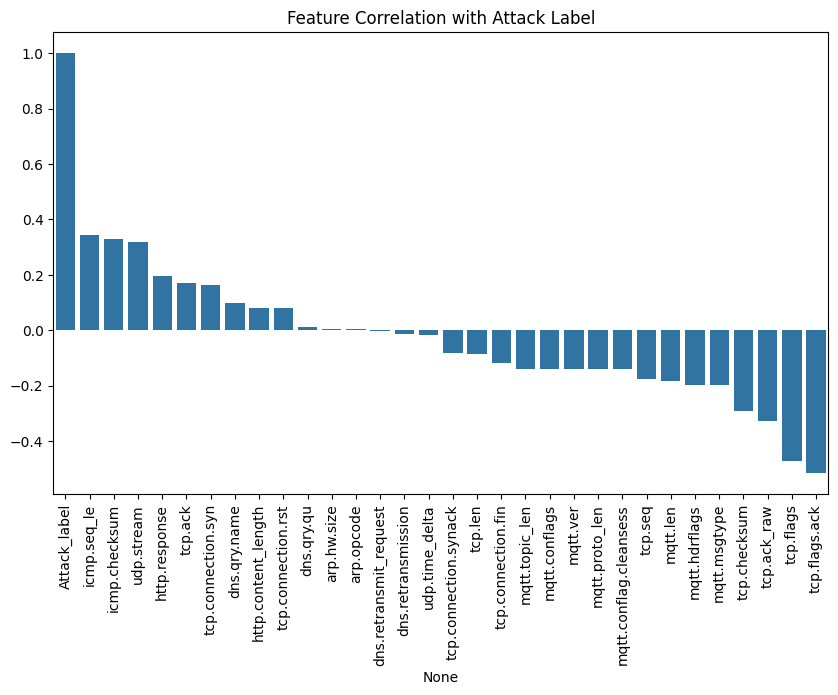

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation with attack label
correlation_matrix = DNN_data.corr(numeric_only=True)

attack_correlation = correlation_matrix["Attack_label"].sort_values(ascending=False)

# Visualize top correlated features
plt.figure(figsize=(10, 6))
sns.barplot(x=attack_correlation.index, y=attack_correlation.values)
plt.xticks(rotation=90)
plt.title("Feature Correlation with Attack Label")
plt.show()

In [78]:
DNN_data.drop(columns=["arp.hw.size","arp.opcode","dns.retransmit_request"],inplace=True)


In [79]:
categ_cols = ["http.request.method","http.referer","http.request.version","dns.qry.name.len","mqtt.conack.flags","mqtt.protoname","mqtt.topic"]

DNN_data_encoded = pd.get_dummies(DNN_data, columns=categ_cols, dtype=int)

In [80]:
def add_6_categories_column(Attack_type):
    new_column = []
    for attack in Attack_type:
        if attack in ["DDoS_TCP","DDoS_UDP", "DDoS_ICMP", "DDoS_HTTP"]:
            new_column.append("DoS/DDoS")

        if attack in ["Vulnerability_scanner","Port_Scanning", "Fingerprinting"]:
            new_column.append("Scanning_Attacks")

        if attack in ["MITM"]:
            new_column.append("MITM")

        if attack in ["XSS","SQL_injection", "Uploading"]:
            new_column.append("Injection Attacks")

        if attack in ["Ransomware", "Backdoor","Password"]:
            new_column.append("Malware")

        if attack in ["Normal"]:
            new_column.append("Normal")
    return new_column    

In [81]:
DNN_categories = add_6_categories_column(DNN_data_encoded["Attack_type"])


In [82]:
DNN_data_encoded["Attack_class"] = DNN_categories
DNN_data_encoded["Attack_type"].unique()

array(['DDoS_UDP', 'Normal', 'Vulnerability_scanner', 'DDoS_ICMP',
       'Password', 'Backdoor', 'Port_Scanning', 'DDoS_HTTP',
       'SQL_injection', 'Uploading', 'DDoS_TCP', 'XSS', 'Ransomware',
       'Fingerprinting', 'MITM'], dtype=object)

In [83]:
DNN_data_encoded.shape

(1958346, 87)

In [85]:
pip install scikit-learn 

Note: you may need to restart the kernel to use updated packages.


In [59]:
DNN_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958346 entries, 0 to 1958345
Data columns (total 87 columns):
 #   Column                                                                                                Dtype  
---  ------                                                                                                -----  
 0   icmp.checksum                                                                                         float64
 1   icmp.seq_le                                                                                           float64
 2   http.content_length                                                                                   float64
 3   http.response                                                                                         float64
 4   tcp.ack                                                                                               float64
 5   tcp.ack_raw                                                                  

In [58]:
DNN_data_encoded.to_csv("processed_dataset.csv", index=False)
